In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:

data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

Well look at some of the data

In [200]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [201]:
data.shape

(2000, 21)

seeing if there is any null in the data


In [202]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

What are the data types of the columns

In [203]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [204]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


In [205]:
data['blue']

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: blue, Length: 2000, dtype: int64

In [206]:
data['blue'] = data['blue'].astype(object)

In [207]:
data.corr().style.background_gradient(cmap = "Blues")

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
clock_speed,0.011482,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399
pc,0.031441,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


In [208]:
columns = data.columns[data.any()].tolist()
a = []
b = []
for item in columns:
  a.append(data[item].min())
  b.append(data[item].max())
df = pd.DataFrame(columns, columns = ['Col'])
df['min']= a
df['max'] = b


In [209]:
# get columns whose min is 0 and max is 1
cols = data.columns[(data.min() == 0) & (data.max() == 1)]

# print the selected columns
print(cols)

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')


In [210]:
data[cols] = data[cols].astype('object')
print(data[cols].dtypes)
data1 = data
data1 =data1.drop(['blue','clock_speed','fc','m_dep','mobile_wt','n_cores','pc','talk_time','three_g','touch_screen'],axis =1)

blue            object
dual_sim        object
four_g          object
three_g         object
touch_screen    object
wifi            object
dtype: object


# categorical features



In [211]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']
print(cat_features)
cat_features1 = [i for i in data1.columns if data1.dtypes[i]=='object']
cat_features1


['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


['dual_sim', 'four_g', 'wifi']

# Numerical Features

In [212]:
num_features = [i for i in data.columns if data.dtypes[i] in ['int64', 'float']]
num_features[: -1]
print(num_features)
num_features1 = [i for i in data1.columns if data1.dtypes[i] in ['int64', 'float']]
num_features1[: -1]
num_features1

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']


['battery_power',
 'int_memory',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'price_range']

In [213]:
data.loc[:,'price_range'].value_counts()



1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

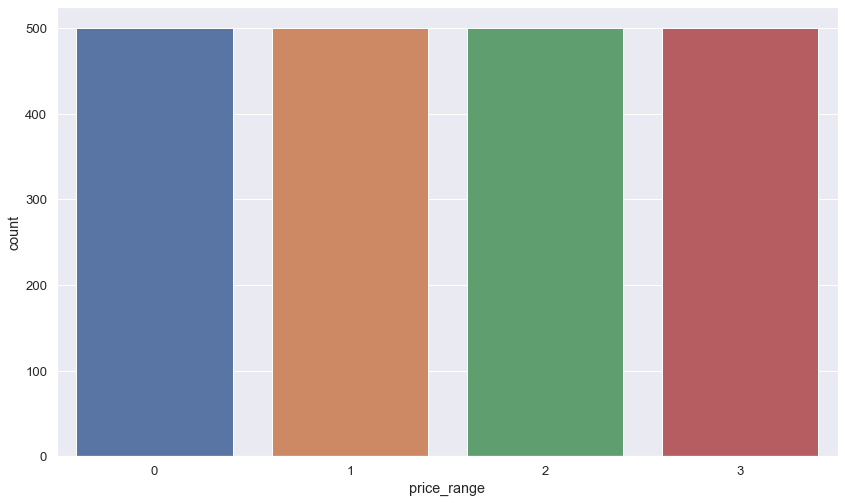

In [214]:
sns.countplot(x = 'price_range',data = data)


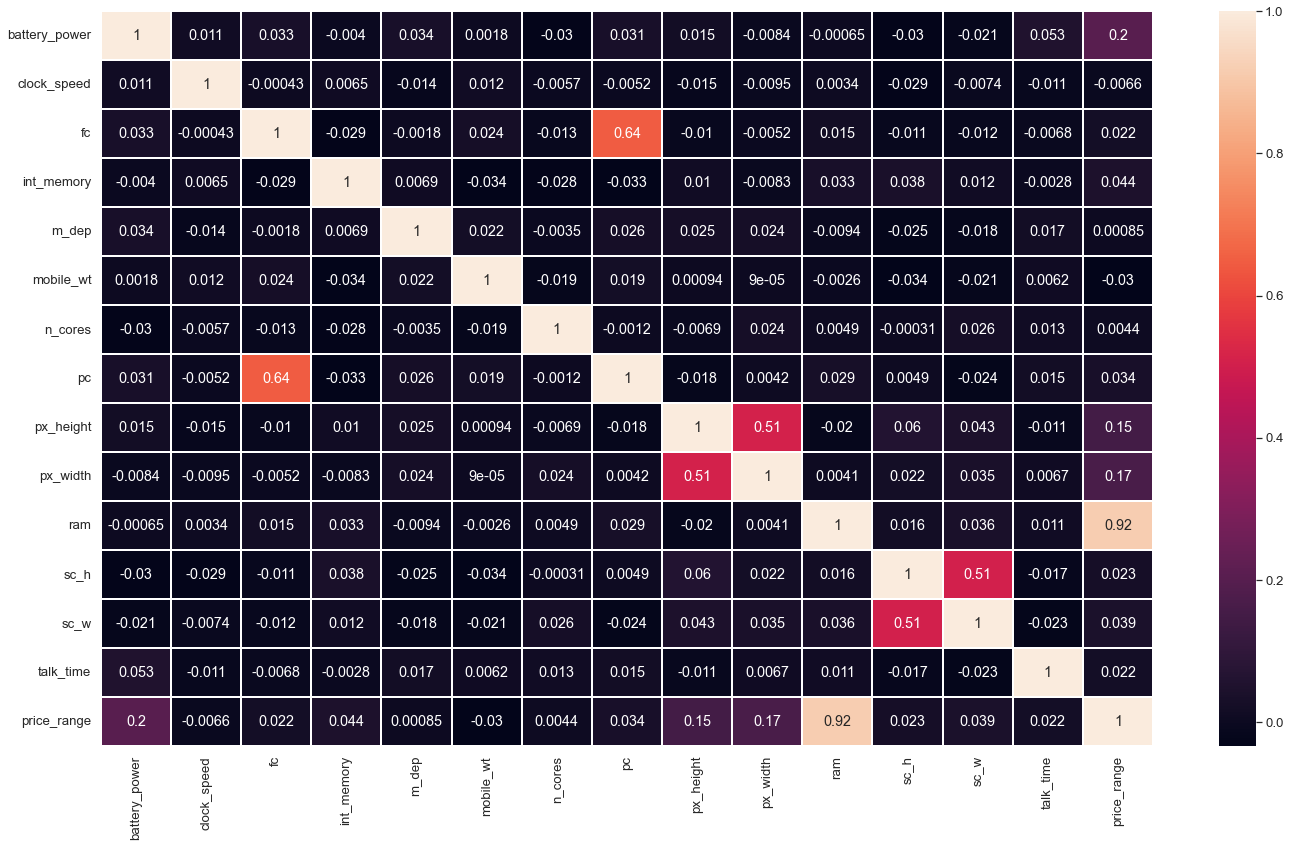

In [215]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot = True, linewidth = 2 )
plt.tight_layout()

<AxesSubplot:title={'center':'Correlation with target feature'}>

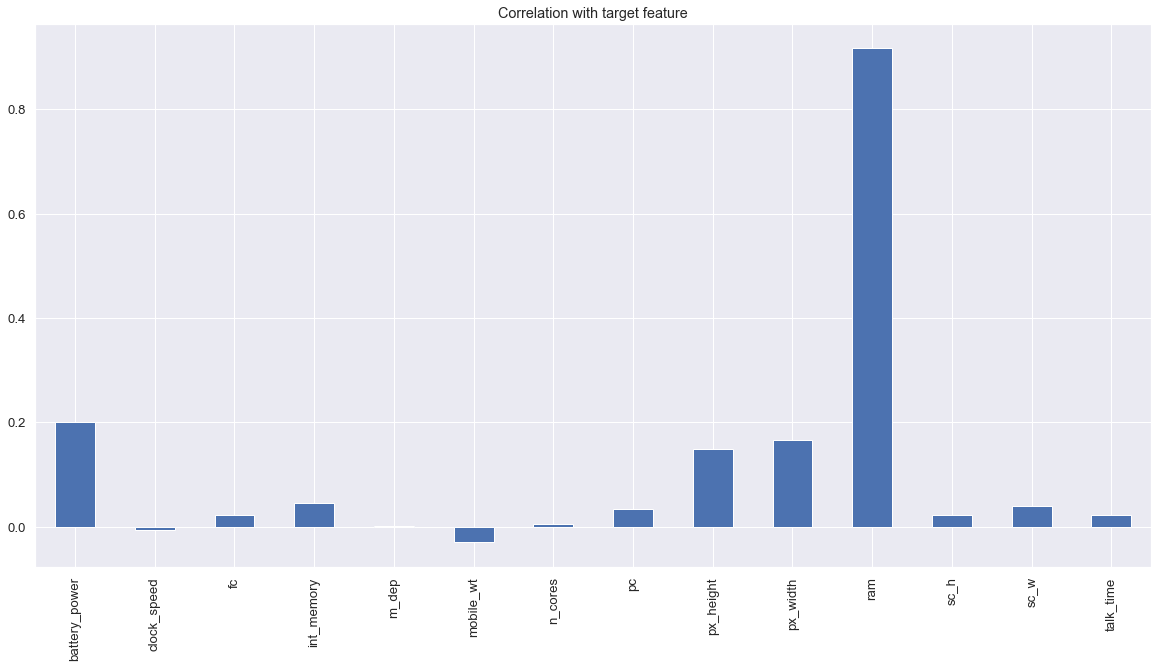

In [216]:
data.drop('price_range', axis=1).corrwith(data.price_range).plot(kind = 'bar', grid = True, figsize=(20,10), 
                                                                 title = 'Correlation with target feature')



# Exploring Numerical Features

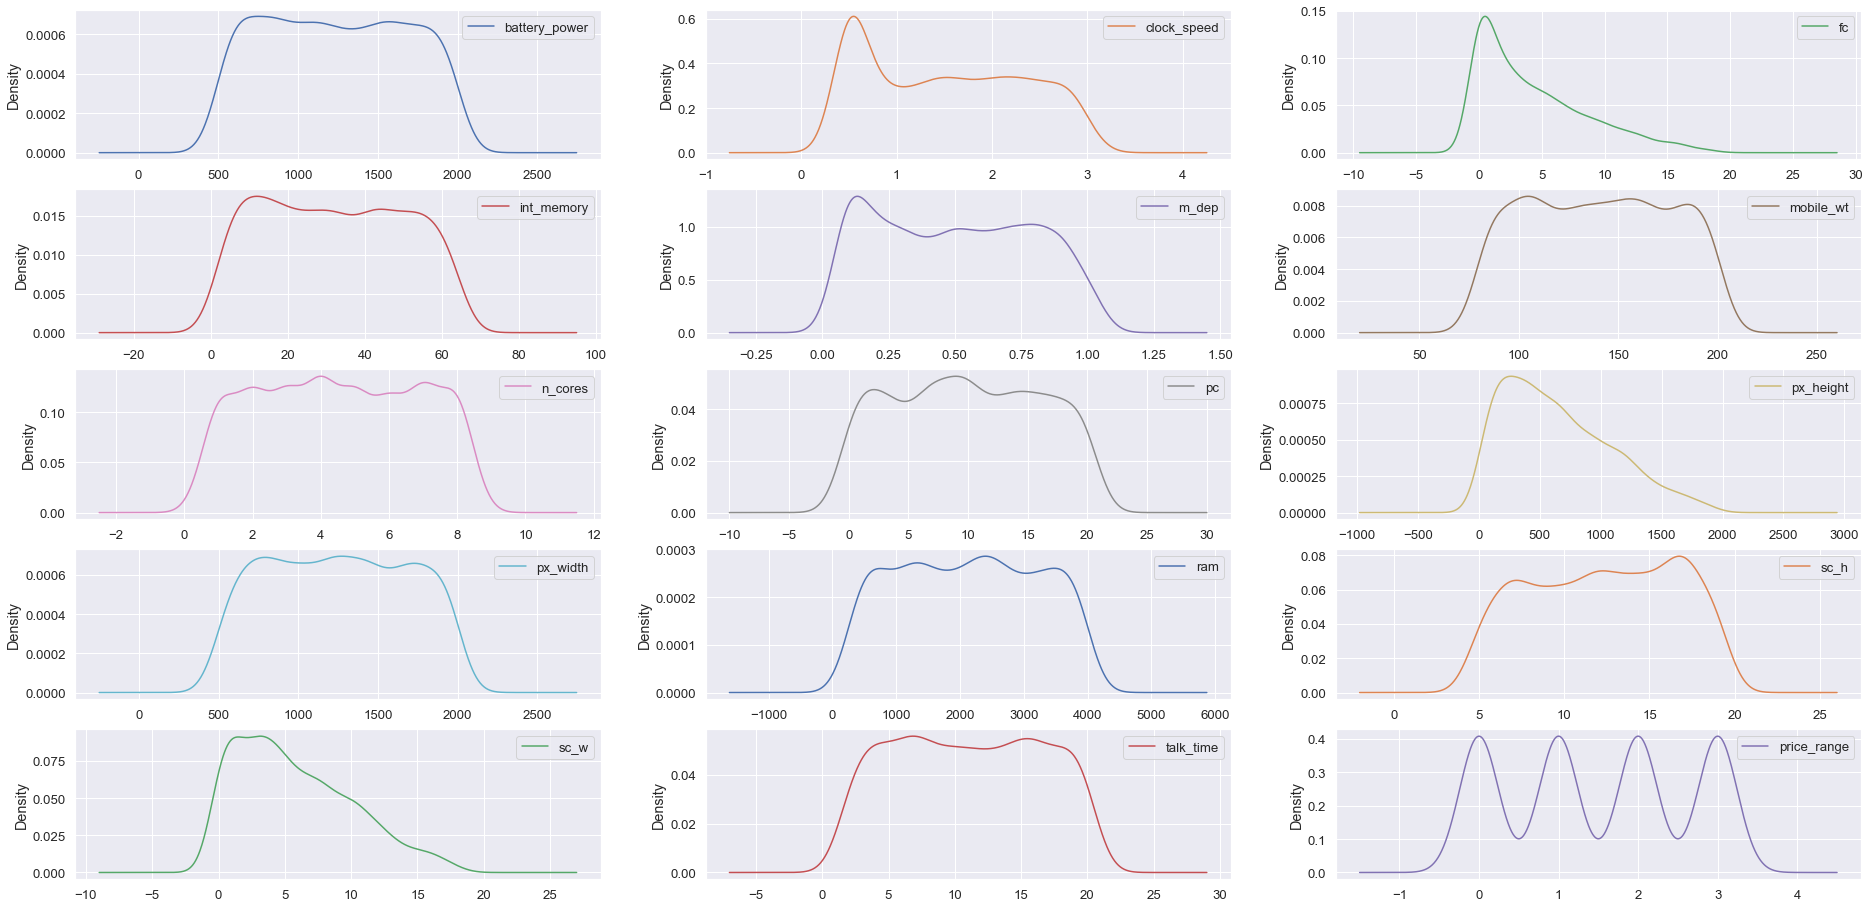

In [217]:
data[num_features].plot(kind='density', layout = (5,3),subplots=True,sharex=False,figsize=(32,16))


plt.show()


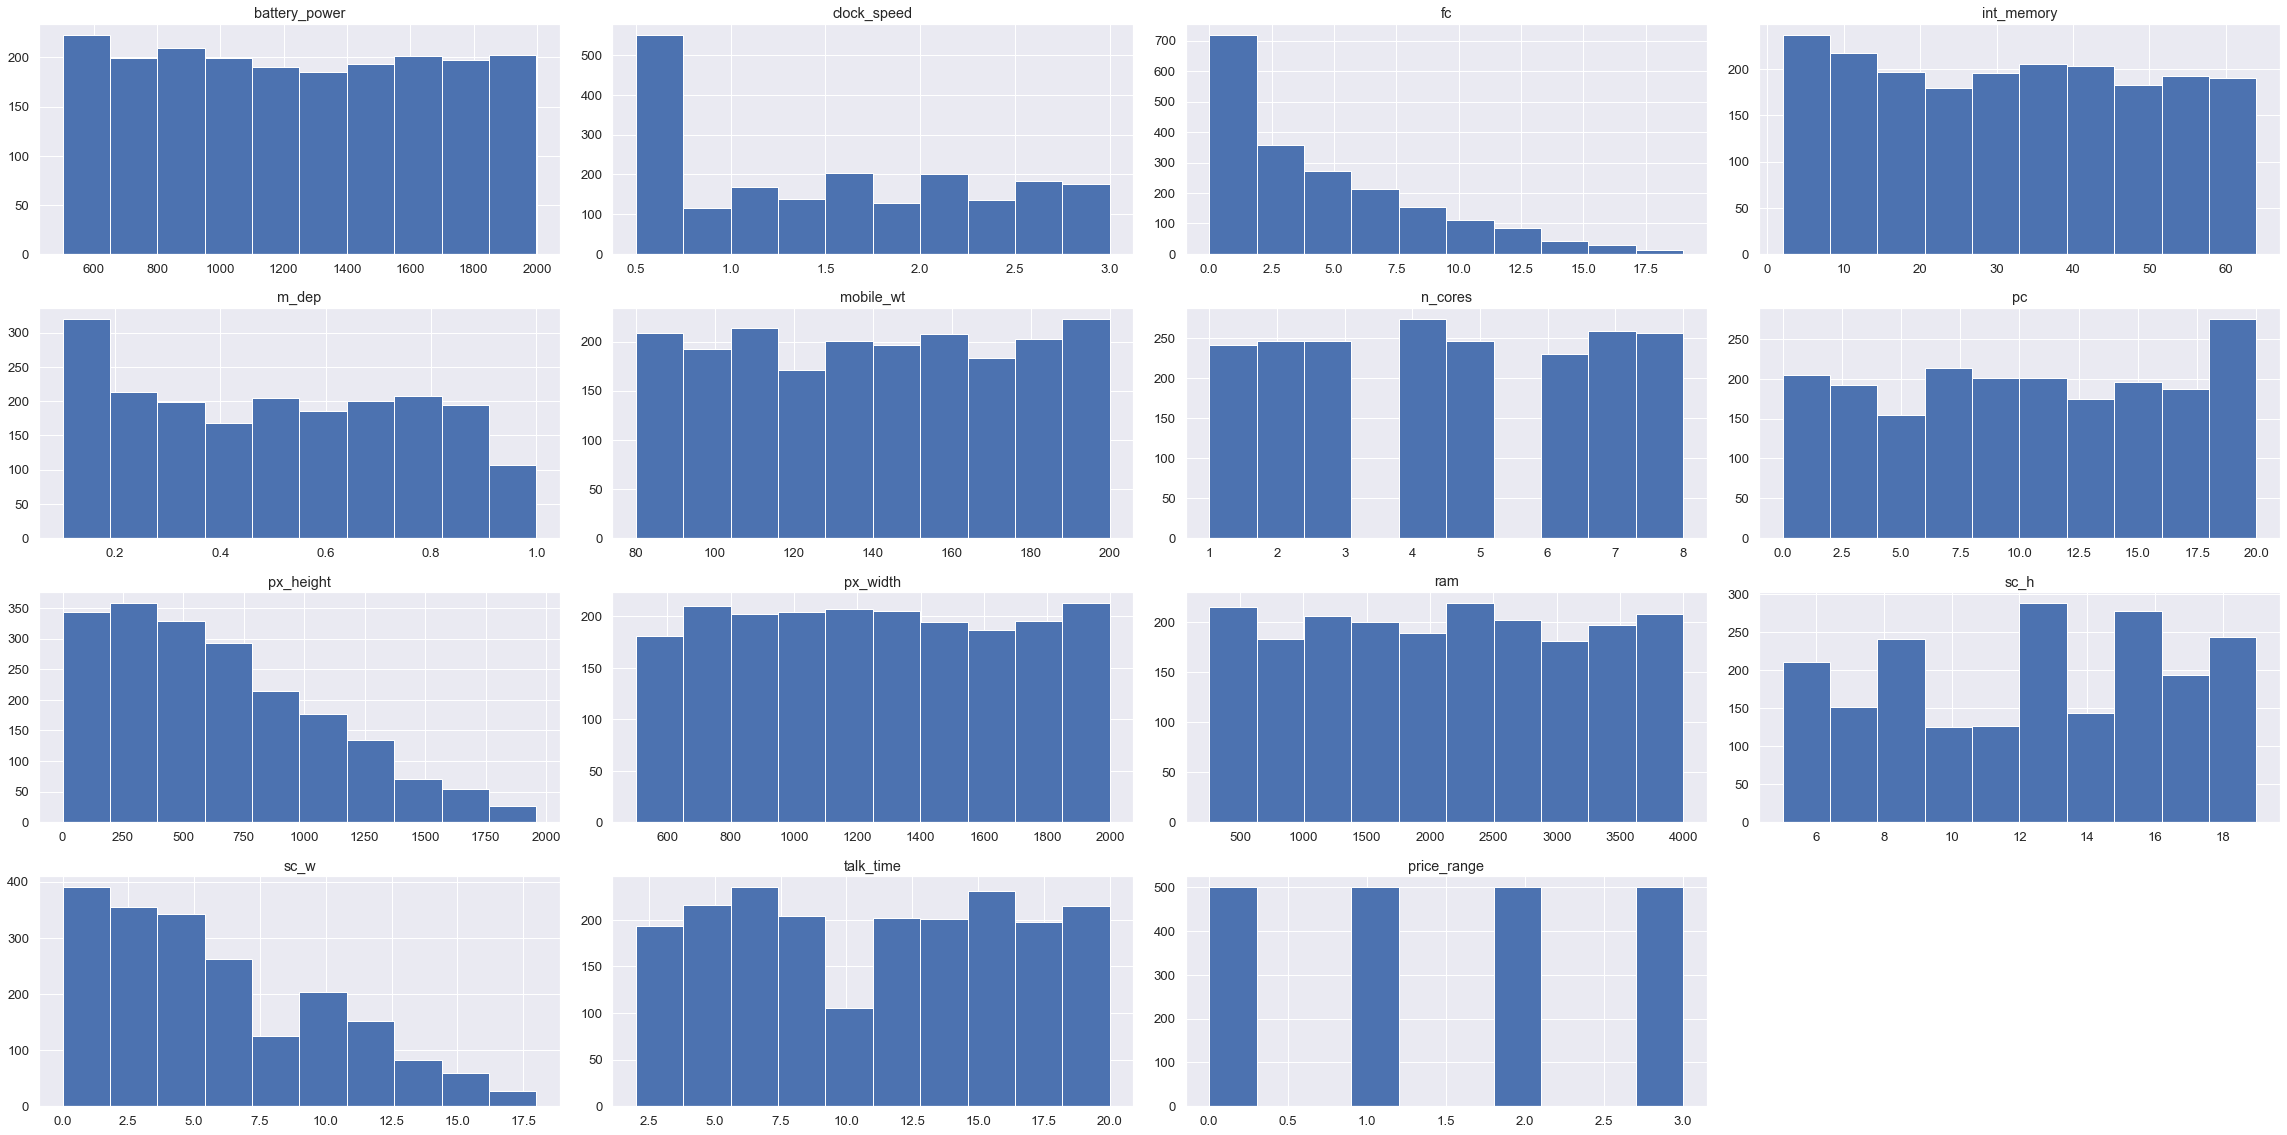

In [218]:
data.hist(figsize=(32,16))
plt.tight_layout()


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


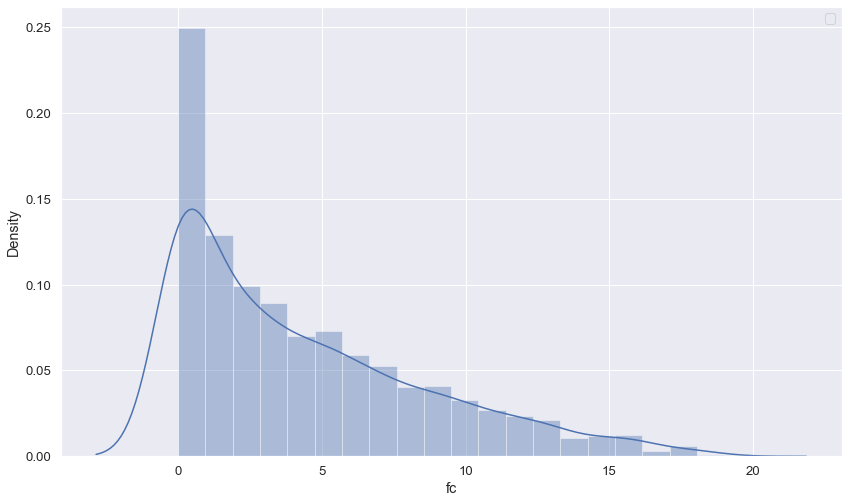

In [219]:
fig = plt.figure(2)
sns.distplot(data['fc'])
plt.legend()


In [220]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


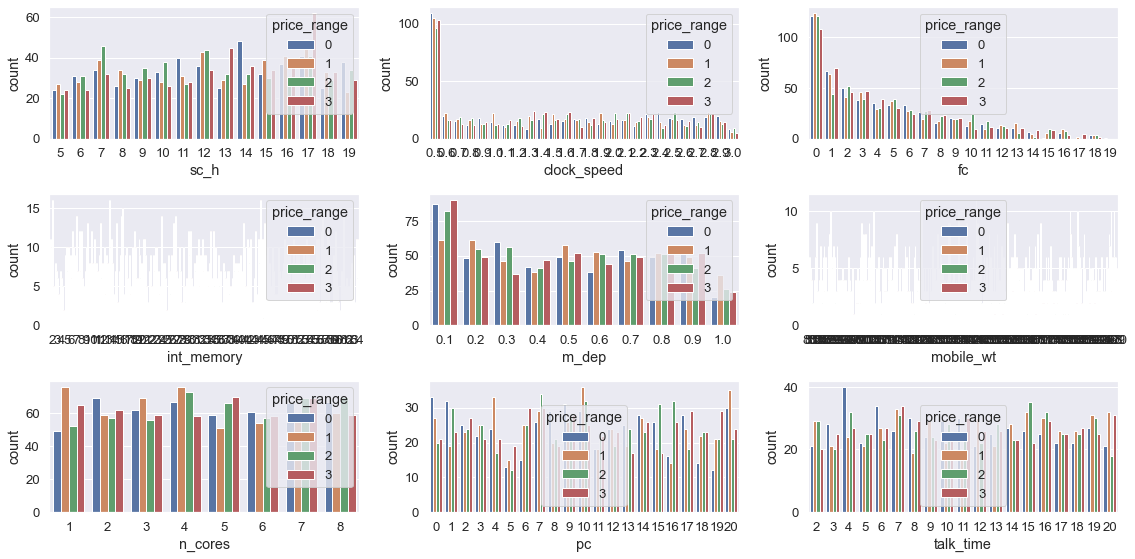

In [221]:
fig, ax = plt.subplots(3,3,figsize = (16,8))
sns.countplot(x=num_features[11],hue='price_range', data=data,ax = ax[0,0])
sns.countplot(x=num_features[1],hue='price_range', data=data,ax = ax[0,1])
sns.countplot(x=num_features[2],hue='price_range', data=data,ax = ax[0,2])
sns.countplot(x=num_features[3],hue='price_range', data=data,ax = ax[1,0])
sns.countplot(x=num_features[4],hue='price_range', data=data,ax = ax[1,1])
sns.countplot(x=num_features[5],hue='price_range', data=data,ax = ax[1,2])
sns.countplot(x=num_features[6],hue='price_range', data=data,ax = ax[2,0])
sns.countplot(x=num_features[7],hue='price_range', data=data,ax = ax[2,1])
sns.countplot(x=num_features[13],hue='price_range', data=data,ax = ax[2,2])

fig.tight_layout()


In [222]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (5,5))
    sns.kdeplot(data[data[target]==0][column], alpha=0.5,shade = True, color="red", label="0", ax = ax)
    sns.kdeplot(data[data[target]==1][column], alpha=0.5,shade = True, color="blue", label="1", ax = ax)
    sns.kdeplot(data[data[target]==2][column], alpha=0.5,shade = True, color="purple", label='2', ax = ax)
    sns.kdeplot(data[data[target]==3][column], alpha=0.5,shade = True, color="#fccc79", label='3', ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

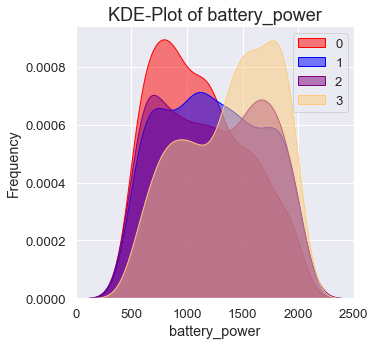

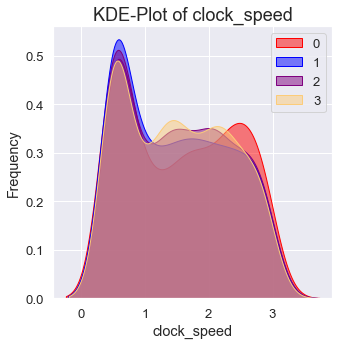

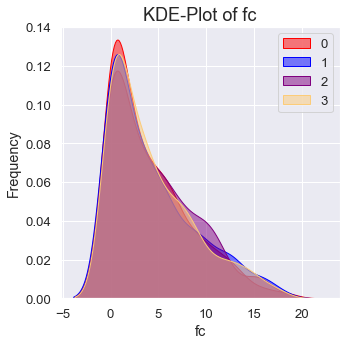

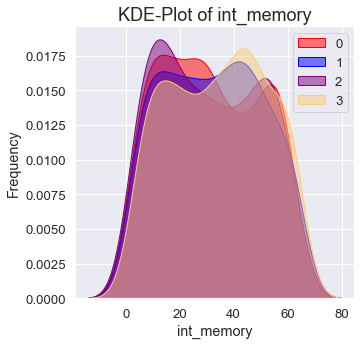

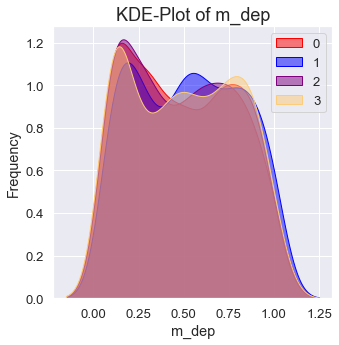

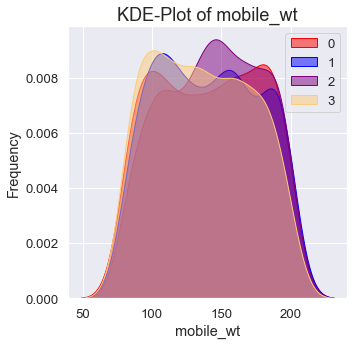

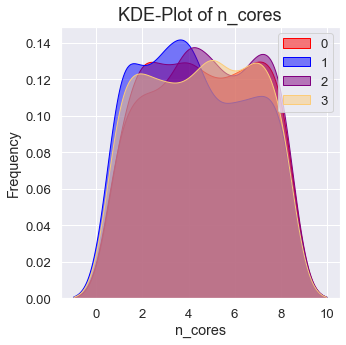

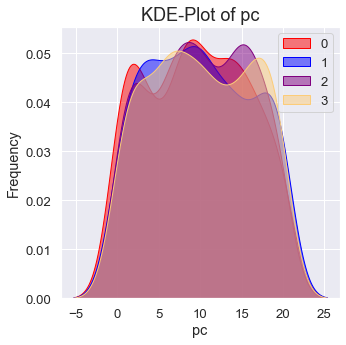

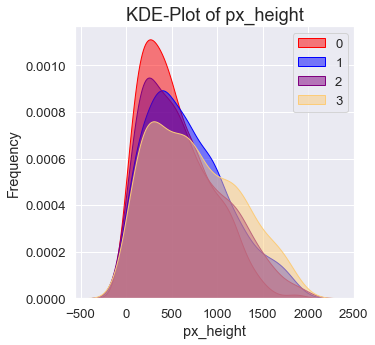

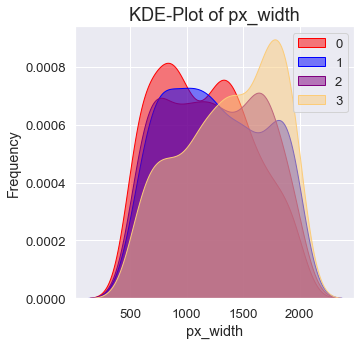

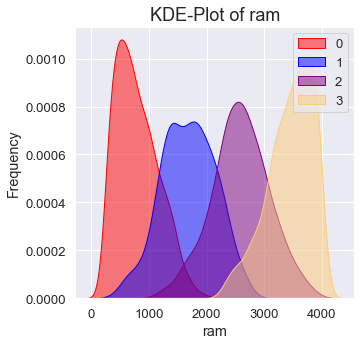

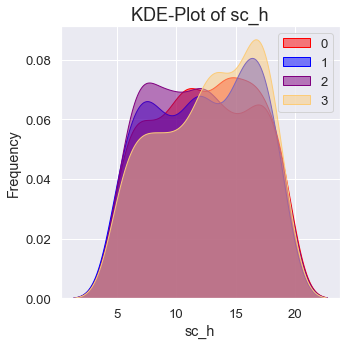

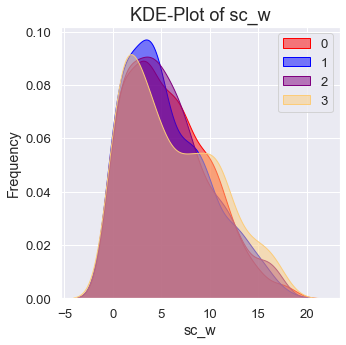

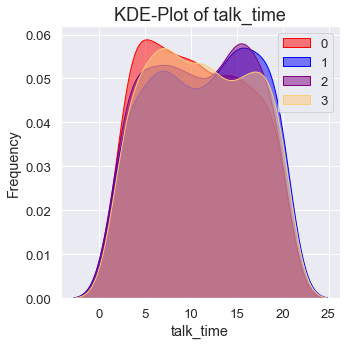

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

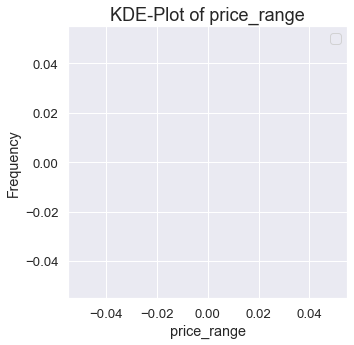

In [223]:
for column in num_features:
    kde_numerical_features(column, "price_range")

In [224]:
#multiclass features

In [225]:
def distribution_categorical_features(data, feature, target) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

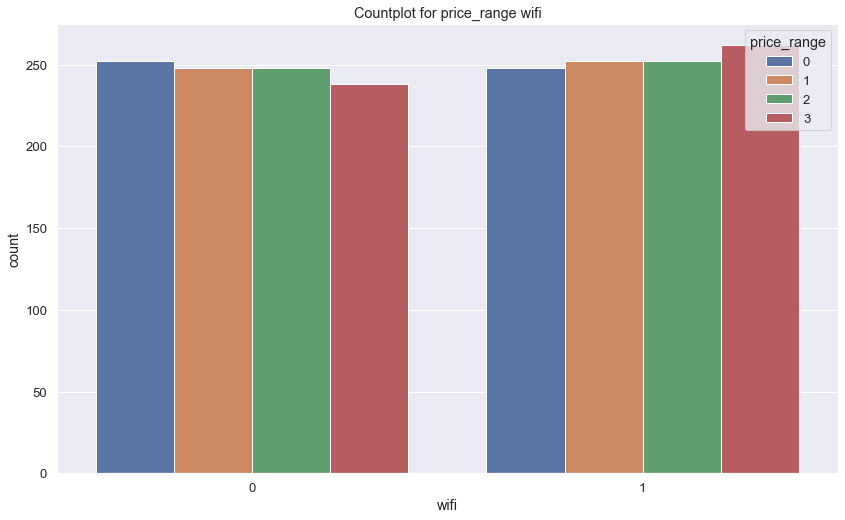

In [226]:
distribution_categorical_features(data, "wifi", "price_range")

In [227]:
# every category of price has almost equal number of no wifi and every category of price_range has almost equal number of wifi containing devices

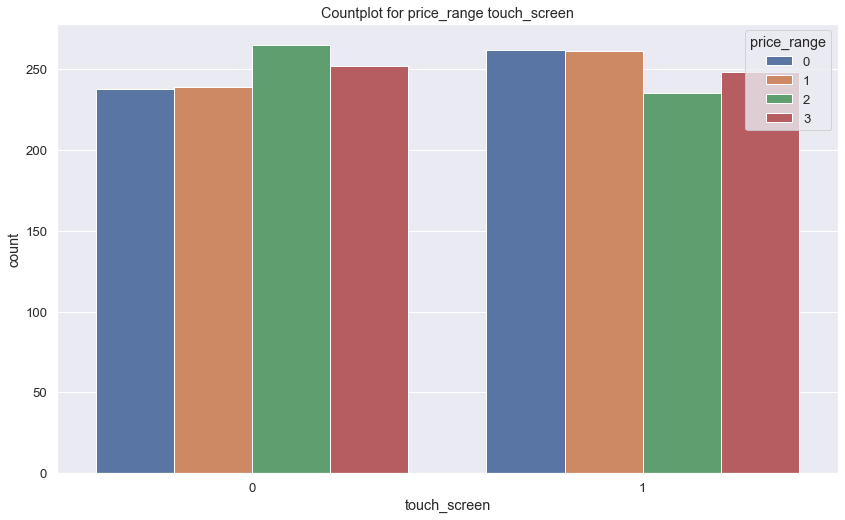

In [228]:
distribution_categorical_features(data, "touch_screen", "price_range")

In [229]:
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

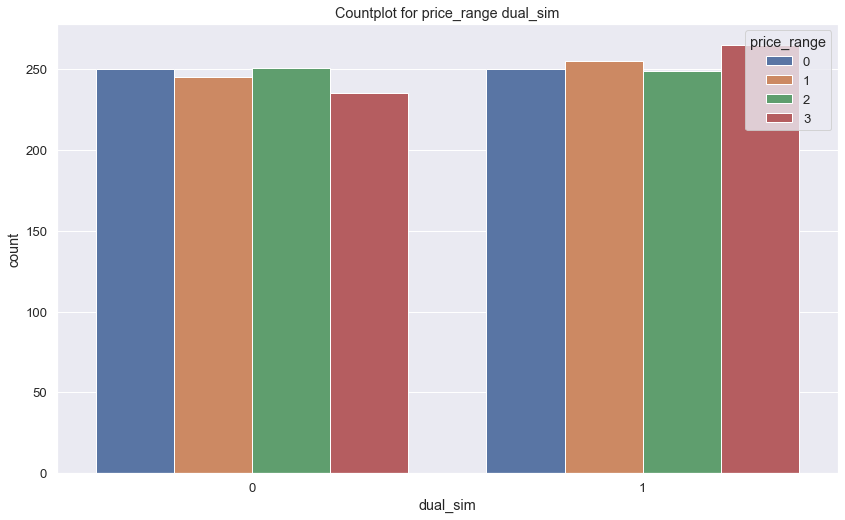

In [230]:
distribution_categorical_features(data, "dual_sim", "price_range")

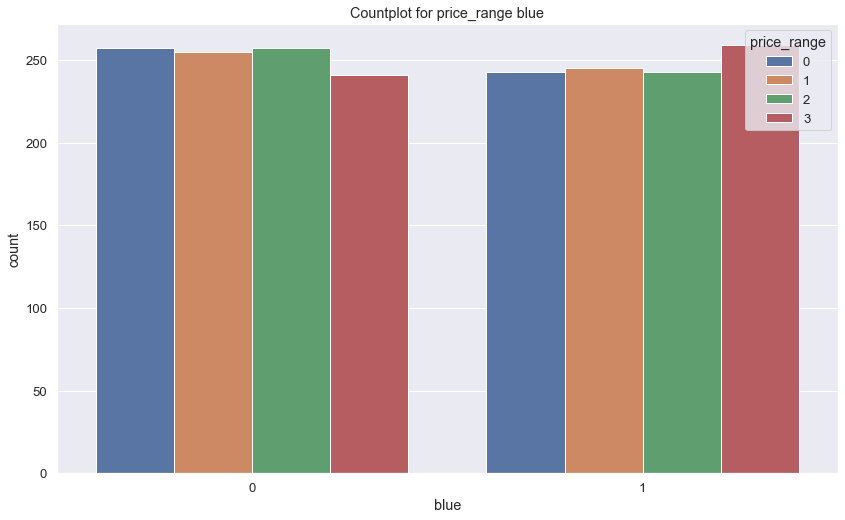

In [231]:
distribution_categorical_features(data, "blue", "price_range")

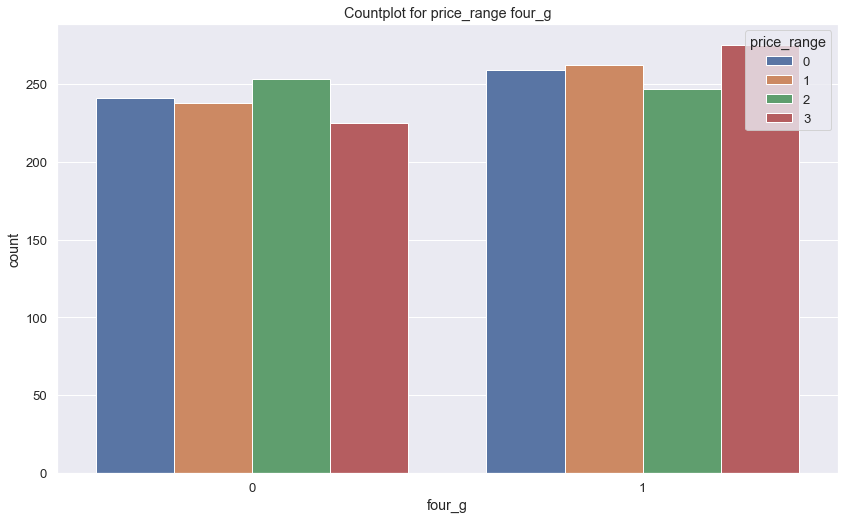

In [232]:
distribution_categorical_features(data, "four_g", "price_range")

# Now for the algorithm implementation


In [233]:
final_df = data[num_features]
X = final_df.drop(columns=['price_range'],axis=1)
y = final_df['price_range']

final_df2 = data1[num_features1]
X1 = final_df2.drop(columns=['price_range'],axis = 1)
y1 = final_df2['price_range']


Scaling data to make good
# important dont scale cat data

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardizer = StandardScaler()
X_scaled_list = standardizer.fit_transform(X)
X_scaled_list1 = standardizer.fit_transform(X1)
num_data = np.array(X_scaled_list)
cat_data = np.array(data[cat_features].values.tolist())

num_data1 = np.array(X_scaled_list1)
cat_data1 = np.array(data1[cat_features1].values.tolist())

In [235]:
X_scaled = np.concatenate((num_data,cat_data), axis=1)
X_scaled = X_scaled.tolist()
X_scaled

X_scaled1 = np.concatenate((num_data1,cat_data1),axis = 1)
X_scaled1 = X_scaled1.tolist()
X_scaled1

[[-0.9025972554689959,
  -1.3806435313202894,
  -1.4089485628999447,
  -1.1467840342018796,
  0.3917034064711061,
  -0.7849832923777195,
  0.2831028012669145,
  0.0,
  0.0,
  1.0],
 [-0.49513856507006043,
  1.1550242242836197,
  0.5857779134312672,
  1.7044646757511204,
  0.4673170183062863,
  1.1142655626114704,
  -0.6353166675633032,
  1.0,
  1.0,
  0.0],
 [-1.5376864991634263,
  0.49354567934346943,
  1.3926842168511246,
  1.0749682073199385,
  0.44149773621622473,
  -0.310171078630422,
  -0.8649215347708576,
  1.0,
  1.0,
  0.0],
 [-1.419318611449769,
  -1.2152738950852517,
  1.2867495904244954,
  1.2369709749309044,
  0.5945691943215896,
  0.8768594557378216,
  0.5127076684744689,
  0.0,
  0.0,
  0.0],
 [1.3259058612938972,
  0.658915315578507,
  1.2687181646497498,
  -0.09145171947901598,
  -0.6576659870463955,
  -1.0223893992513682,
  -0.8649215347708576,
  0.0,
  1.0,
  0.0],
 [1.4124054715461853,
  -0.5537953501451016,
  0.8089168073937417,
  0.9314800417216544,
  -0.974874309

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RANDOM_STATE = 55

In [237]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)


X_train1, X_val1, y_train1, y_val1 = train_test_split(X_scaled1, y1, test_size = 0.25, random_state=42)

In [238]:
""" print(f"target proportion: {sum(y_train)/len(y_train)}") """
y_train

1738    1
548     2
936     3
1389    0
1607    2
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1500, dtype: int64

In [239]:
print(cat_features1)

['dual_sim', 'four_g', 'wifi']


In [240]:
min_samples_split_list = [2,10,30,50,100,200,300,700] #integer gives actual sample quantity
max_depth_list = [1,2,3,4,8,16,32,64,None] # none means that there is no depth limit
n_estimators_list = [10,50,100,200,300,400,500]

# Finding hyperparameter minsamplesforsplitting

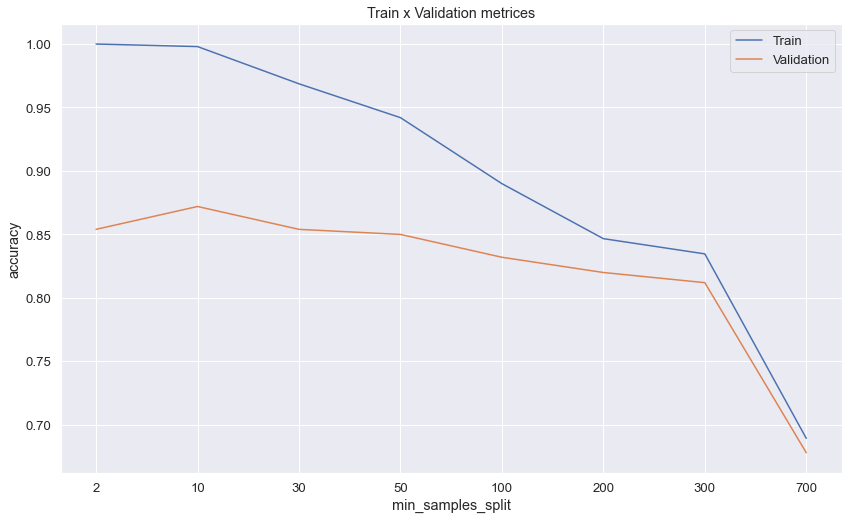

In [241]:
import matplotlib.pyplot as plt
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split= min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title("Train x Validation metrices")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["Train", "Validation"])

# Increasing min_samples_split 

Reduces the overfitting drastically train accuracy and test accuracy is near so min_sample_split = 200

# Max_depth hyperparameter

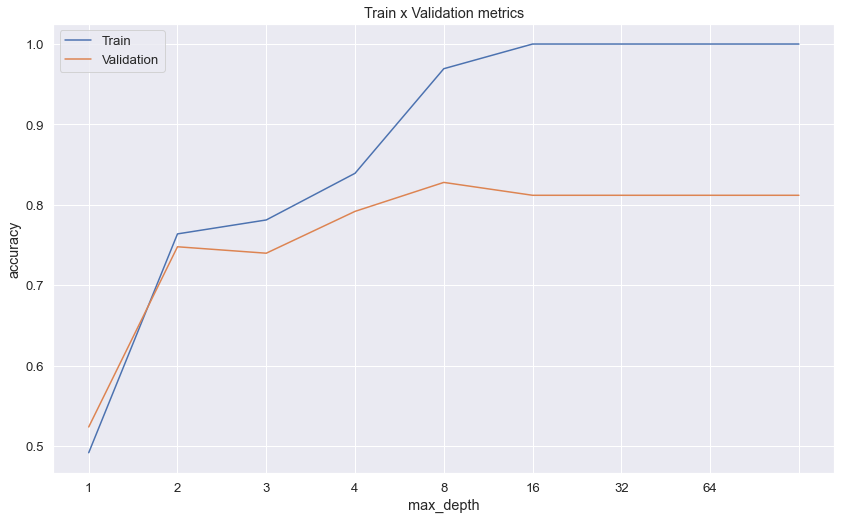

In [242]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# max_depth = 4  ideal case

# n_estimators

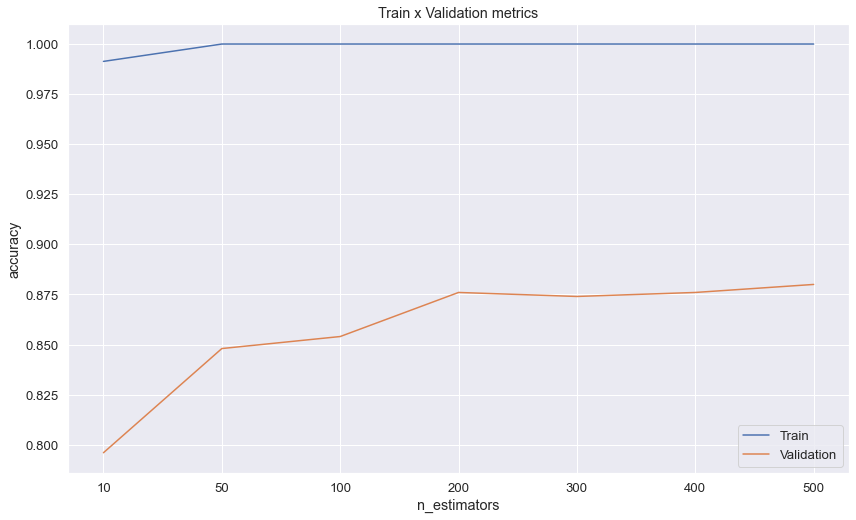

In [243]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# n_estimators = 200

In [273]:
random_forest_model = RandomForestClassifier(n_estimators = 200, max_depth = 4 , min_samples_split = 200).fit(X_train, y_train)

feature_names1 = ['battery_power','int_memory','px_height','px_width','ram','sc_h','sc_w','dual_sim','four_g','wifi']
random_forest_model1.feature_names = feature_names1
random_forest_model1 =  RandomForestClassifier(n_estimators = 200, max_depth = 4 , min_samples_split = 200).fit(X_train1, y_train1 )


In [247]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8433
Metrics test:
	Accuracy score: 0.8260


# XG Boost

In [248]:
from xgboost import XGBClassifier
n = int(len(X_train)*0.8) 

In [249]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [250]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state=42)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-mlogloss:1.25072
[1]	validation_0-mlogloss:1.13982
[2]	validation_0-mlogloss:1.04782
[3]	validation_0-mlogloss:0.97080
[4]	validation_0-mlogloss:0.90189
[5]	validation_0-mlogloss:0.84400
[6]	validation_0-mlogloss:0.79500
[7]	validation_0-mlogloss:0.74989
[8]	validation_0-mlogloss:0.70865
[9]	validation_0-mlogloss:0.67332
[10]	validation_0-mlogloss:0.63985
[11]	validation_0-mlogloss:0.61032
[12]	validation_0-mlogloss:0.58539
[13]	validation_0-mlogloss:0.56333
[14]	validation_0-mlogloss:0.54201
[15]	validation_0-mlogloss:0.51980
[16]	validation_0-mlogloss:0.50278


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-mlogloss:0.48422
[18]	validation_0-mlogloss:0.46603
[19]	validation_0-mlogloss:0.44991
[20]	validation_0-mlogloss:0.43598
[21]	validation_0-mlogloss:0.42146
[22]	validation_0-mlogloss:0.41069
[23]	validation_0-mlogloss:0.40110
[24]	validation_0-mlogloss:0.39030
[25]	validation_0-mlogloss:0.37901
[26]	validation_0-mlogloss:0.37159
[27]	validation_0-mlogloss:0.36177
[28]	validation_0-mlogloss:0.35486
[29]	validation_0-mlogloss:0.34823
[30]	validation_0-mlogloss:0.34340
[31]	validation_0-mlogloss:0.33613
[32]	validation_0-mlogloss:0.33055
[33]	validation_0-mlogloss:0.32672
[34]	validation_0-mlogloss:0.32054
[35]	validation_0-mlogloss:0.31447
[36]	validation_0-mlogloss:0.31058
[37]	validation_0-mlogloss:0.30690
[38]	validation_0-mlogloss:0.30278
[39]	validation_0-mlogloss:0.29783
[40]	validation_0-mlogloss:0.29310
[41]	validation_0-mlogloss:0.28870
[42]	validation_0-mlogloss:0.28524
[43]	validation_0-mlogloss:0.28285
[44]	validation_0-mlogloss:0.28020
[45]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [251]:
xgb_model.best_iteration

103

In [252]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9753
Metrics test:
	Accuracy score: 0.8960


# logistic Regression

In [253]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)

In [254]:
import joblib
joblib.dump(logreg,r'./dataset/lg.sav')

['./dataset/lg.sav']

In [255]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.92      0.98      0.95       118
           2       0.99      0.91      0.95       120
           3       0.96      0.99      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [256]:
print(accuracy_score(y_val,y_pred))

0.962


Text(0.5, 527.9871999999999, 'Predicted label')

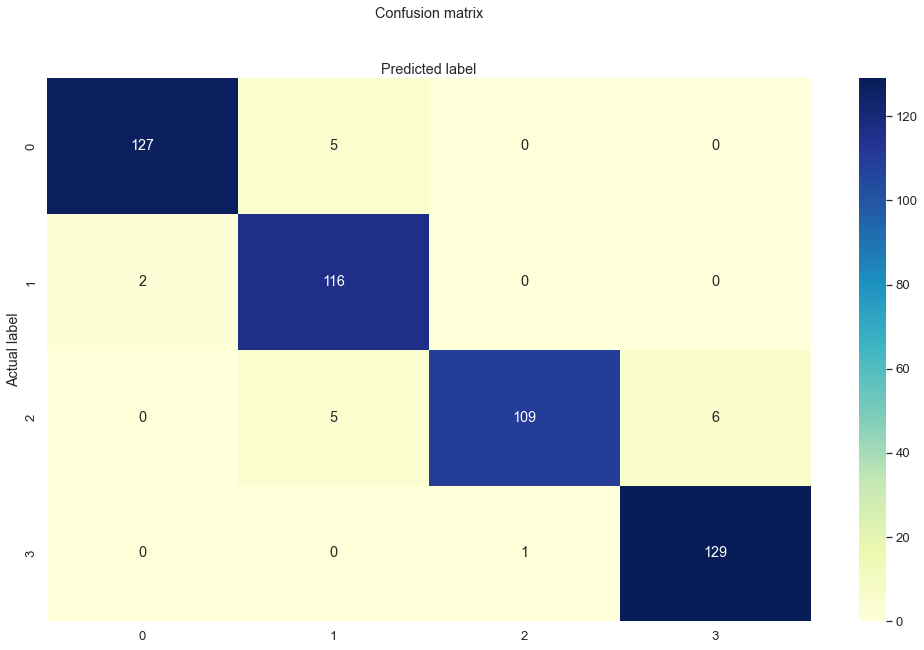

In [257]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



# Linear SVC

In [258]:
linear_svc = LinearSVC()

In [259]:
linear_svc.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [260]:
y_pred = model.predict(X_val)

In [261]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       132
           1       0.82      0.86      0.84       118
           2       0.84      0.80      0.82       120
           3       0.92      0.92      0.92       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [262]:
print(accuracy_score(y_val,y_pred))

0.88


Text(0.5, 527.9871999999999, 'Predicted label')

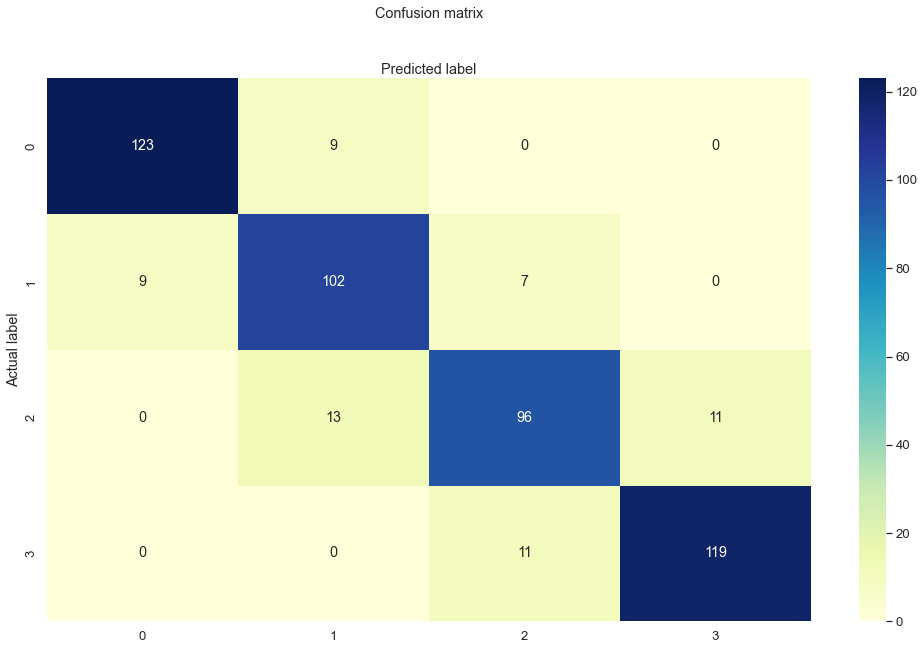

In [263]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# KNeighbour Classifier

In [264]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# acc = accuracy_score(y_val,y_pred)

# print(acc)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       132
           1       0.40      0.53      0.45       118
           2       0.46      0.48      0.47       120
           3       0.85      0.64      0.73       130

    accuracy                           0.58       500
   macro avg       0.61      0.58      0.59       500
weighted avg       0.62      0.58      0.59       500



# CAT Boosting

In [265]:
import catboost as cb
cb_clf = cb.CatBoostClassifier()

In [266]:
cb_clf.fit(X_train,y_train)

Learning rate set to 0.08078
0:	learn: 1.2805532	total: 7.24ms	remaining: 7.23s
1:	learn: 1.1874020	total: 13ms	remaining: 6.49s
2:	learn: 1.1173256	total: 17.9ms	remaining: 5.95s
3:	learn: 1.0548139	total: 23ms	remaining: 5.72s
4:	learn: 0.9912600	total: 28.5ms	remaining: 5.67s
5:	learn: 0.9275809	total: 33.7ms	remaining: 5.58s
6:	learn: 0.8857196	total: 39ms	remaining: 5.53s
7:	learn: 0.8445542	total: 44.3ms	remaining: 5.49s
8:	learn: 0.8021059	total: 49.2ms	remaining: 5.42s
9:	learn: 0.7700111	total: 54.7ms	remaining: 5.41s
10:	learn: 0.7351655	total: 60.1ms	remaining: 5.4s
11:	learn: 0.7073044	total: 64.7ms	remaining: 5.33s
12:	learn: 0.6832190	total: 70ms	remaining: 5.31s
13:	learn: 0.6572875	total: 75ms	remaining: 5.28s
14:	learn: 0.6262938	total: 80.7ms	remaining: 5.3s
15:	learn: 0.6074439	total: 85.9ms	remaining: 5.29s
16:	learn: 0.5923987	total: 90.8ms	remaining: 5.25s
17:	learn: 0.5749902	total: 96.2ms	remaining: 5.25s
18:	learn: 0.5562299	total: 102ms	remaining: 5.26s
19:	le

160:	learn: 0.1328877	total: 896ms	remaining: 4.67s
161:	learn: 0.1326494	total: 901ms	remaining: 4.66s
162:	learn: 0.1321482	total: 907ms	remaining: 4.66s
163:	learn: 0.1316798	total: 912ms	remaining: 4.65s
164:	learn: 0.1312454	total: 918ms	remaining: 4.64s
165:	learn: 0.1303528	total: 923ms	remaining: 4.64s
166:	learn: 0.1298255	total: 928ms	remaining: 4.63s
167:	learn: 0.1286109	total: 933ms	remaining: 4.62s
168:	learn: 0.1278224	total: 939ms	remaining: 4.62s
169:	learn: 0.1267957	total: 944ms	remaining: 4.61s
170:	learn: 0.1264522	total: 950ms	remaining: 4.61s
171:	learn: 0.1256375	total: 956ms	remaining: 4.6s
172:	learn: 0.1250057	total: 961ms	remaining: 4.59s
173:	learn: 0.1243296	total: 966ms	remaining: 4.58s
174:	learn: 0.1235033	total: 971ms	remaining: 4.58s
175:	learn: 0.1229166	total: 976ms	remaining: 4.57s
176:	learn: 0.1219298	total: 981ms	remaining: 4.56s
177:	learn: 0.1214223	total: 988ms	remaining: 4.56s
178:	learn: 0.1209481	total: 994ms	remaining: 4.56s
179:	learn: 0

324:	learn: 0.0703656	total: 1.79s	remaining: 3.73s
325:	learn: 0.0701183	total: 1.8s	remaining: 3.72s
326:	learn: 0.0699692	total: 1.8s	remaining: 3.71s
327:	learn: 0.0697035	total: 1.81s	remaining: 3.71s
328:	learn: 0.0694728	total: 1.82s	remaining: 3.7s
329:	learn: 0.0691760	total: 1.82s	remaining: 3.7s
330:	learn: 0.0689455	total: 1.83s	remaining: 3.69s
331:	learn: 0.0688086	total: 1.83s	remaining: 3.69s
332:	learn: 0.0685855	total: 1.84s	remaining: 3.68s
333:	learn: 0.0682914	total: 1.84s	remaining: 3.67s
334:	learn: 0.0681212	total: 1.85s	remaining: 3.67s
335:	learn: 0.0679519	total: 1.85s	remaining: 3.66s
336:	learn: 0.0677571	total: 1.86s	remaining: 3.66s
337:	learn: 0.0675695	total: 1.86s	remaining: 3.65s
338:	learn: 0.0673876	total: 1.87s	remaining: 3.65s
339:	learn: 0.0671699	total: 1.88s	remaining: 3.64s
340:	learn: 0.0669240	total: 1.88s	remaining: 3.64s
341:	learn: 0.0666992	total: 1.89s	remaining: 3.63s
342:	learn: 0.0665333	total: 1.89s	remaining: 3.62s
343:	learn: 0.06

492:	learn: 0.0439642	total: 2.7s	remaining: 2.77s
493:	learn: 0.0438613	total: 2.7s	remaining: 2.77s
494:	learn: 0.0437665	total: 2.71s	remaining: 2.76s
495:	learn: 0.0436492	total: 2.71s	remaining: 2.75s
496:	learn: 0.0435135	total: 2.72s	remaining: 2.75s
497:	learn: 0.0434348	total: 2.72s	remaining: 2.74s
498:	learn: 0.0433641	total: 2.73s	remaining: 2.74s
499:	learn: 0.0432992	total: 2.73s	remaining: 2.73s
500:	learn: 0.0431974	total: 2.74s	remaining: 2.73s
501:	learn: 0.0430740	total: 2.74s	remaining: 2.72s
502:	learn: 0.0430100	total: 2.75s	remaining: 2.71s
503:	learn: 0.0428833	total: 2.75s	remaining: 2.71s
504:	learn: 0.0427688	total: 2.76s	remaining: 2.7s
505:	learn: 0.0426280	total: 2.76s	remaining: 2.69s
506:	learn: 0.0425438	total: 2.77s	remaining: 2.69s
507:	learn: 0.0424434	total: 2.77s	remaining: 2.68s
508:	learn: 0.0423817	total: 2.77s	remaining: 2.68s
509:	learn: 0.0422916	total: 2.78s	remaining: 2.67s
510:	learn: 0.0422009	total: 2.78s	remaining: 2.66s
511:	learn: 0.0

663:	learn: 0.0307212	total: 3.6s	remaining: 1.82s
664:	learn: 0.0306791	total: 3.6s	remaining: 1.81s
665:	learn: 0.0306095	total: 3.61s	remaining: 1.81s
666:	learn: 0.0305578	total: 3.62s	remaining: 1.8s
667:	learn: 0.0304834	total: 3.62s	remaining: 1.8s
668:	learn: 0.0304510	total: 3.63s	remaining: 1.79s
669:	learn: 0.0304097	total: 3.63s	remaining: 1.79s
670:	learn: 0.0303095	total: 3.64s	remaining: 1.78s
671:	learn: 0.0302349	total: 3.64s	remaining: 1.78s
672:	learn: 0.0301523	total: 3.65s	remaining: 1.77s
673:	learn: 0.0300514	total: 3.65s	remaining: 1.77s
674:	learn: 0.0300161	total: 3.66s	remaining: 1.76s
675:	learn: 0.0299674	total: 3.66s	remaining: 1.75s
676:	learn: 0.0299234	total: 3.67s	remaining: 1.75s
677:	learn: 0.0298768	total: 3.67s	remaining: 1.75s
678:	learn: 0.0298346	total: 3.68s	remaining: 1.74s
679:	learn: 0.0297680	total: 3.68s	remaining: 1.73s
680:	learn: 0.0297457	total: 3.69s	remaining: 1.73s
681:	learn: 0.0296855	total: 3.69s	remaining: 1.72s
682:	learn: 0.02

835:	learn: 0.0225763	total: 4.5s	remaining: 883ms
836:	learn: 0.0225305	total: 4.51s	remaining: 878ms
837:	learn: 0.0225041	total: 4.51s	remaining: 873ms
838:	learn: 0.0224493	total: 4.52s	remaining: 867ms
839:	learn: 0.0224218	total: 4.52s	remaining: 862ms
840:	learn: 0.0223985	total: 4.53s	remaining: 856ms
841:	learn: 0.0223835	total: 4.53s	remaining: 851ms
842:	learn: 0.0223529	total: 4.54s	remaining: 846ms
843:	learn: 0.0223113	total: 4.54s	remaining: 840ms
844:	learn: 0.0223068	total: 4.55s	remaining: 835ms
845:	learn: 0.0222852	total: 4.55s	remaining: 829ms
846:	learn: 0.0222591	total: 4.56s	remaining: 824ms
847:	learn: 0.0222186	total: 4.57s	remaining: 819ms
848:	learn: 0.0221870	total: 4.57s	remaining: 813ms
849:	learn: 0.0221620	total: 4.58s	remaining: 808ms
850:	learn: 0.0221278	total: 4.58s	remaining: 803ms
851:	learn: 0.0220911	total: 4.59s	remaining: 797ms
852:	learn: 0.0220465	total: 4.6s	remaining: 792ms
853:	learn: 0.0220185	total: 4.6s	remaining: 787ms
854:	learn: 0.0

In [267]:
y_pred = model.predict(X_val)

In [268]:
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       132
           1       0.82      0.86      0.84       118
           2       0.84      0.80      0.82       120
           3       0.92      0.92      0.92       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

0.88


Text(0.5, 527.9871999999999, 'Predicted label')

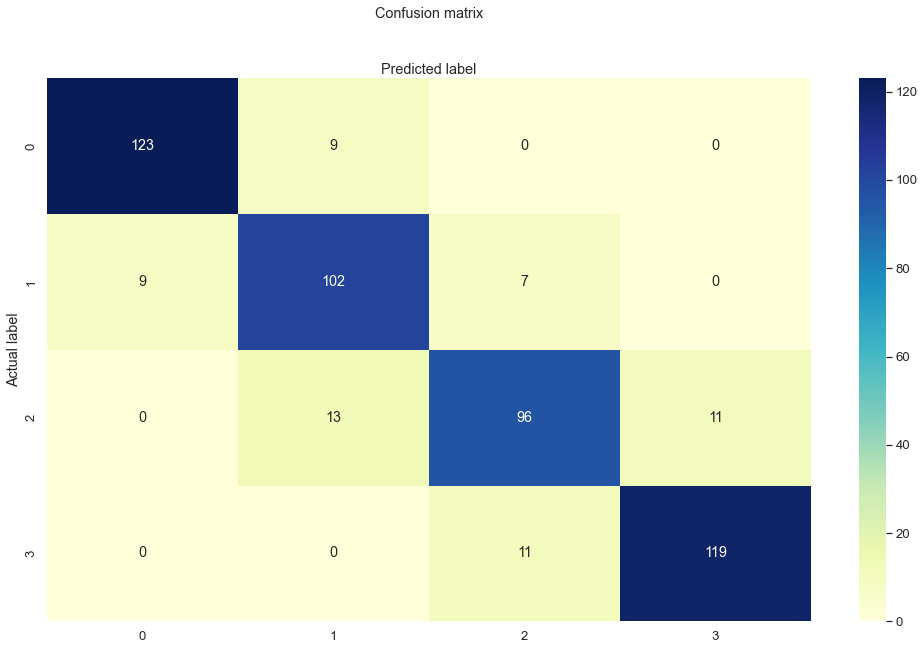

In [269]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# LGBM Classifier

In [270]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

print(classification_report(y_val,y_pred))



              precision    recall  f1-score   support

           0       0.95      0.94      0.94       132
           1       0.86      0.92      0.89       118
           2       0.88      0.83      0.85       120
           3       0.92      0.91      0.91       130

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Text(0.5, 527.9871999999999, 'Predicted label')

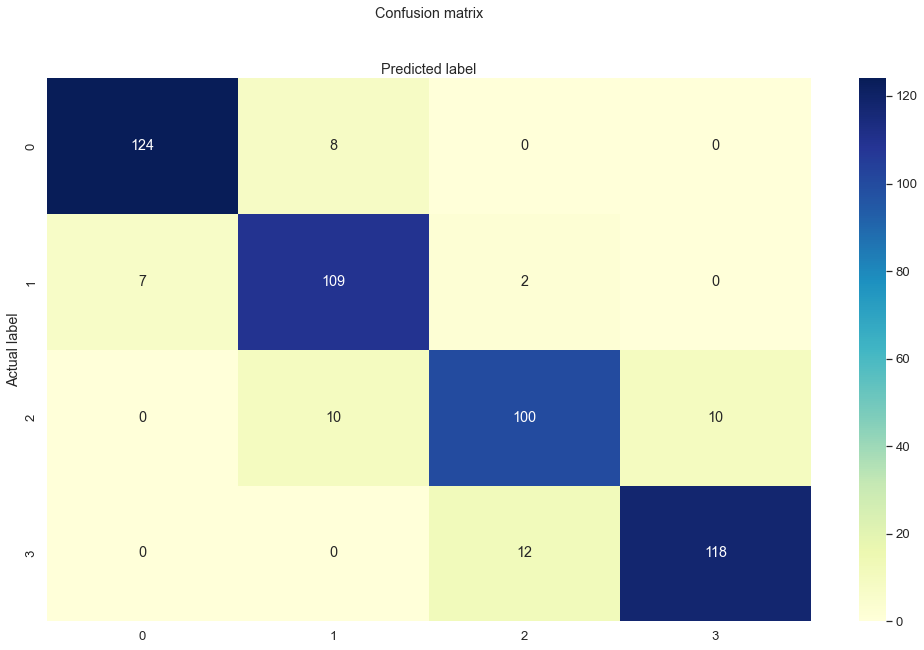

In [271]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [274]:
import joblib
joblib.dump(random_forest_model1, 'model.pkl',compress = 1)

['model.pkl']